# Adaptive Intelligence COM3240
## Lab 1: Learning and Remembering with the Hebbian rule

### Lecturers and Lab Assistants###

- Prof. Eleni Vasilaki ~ e.vasilaki@sheffield.ac.uk
- Avgoustinos Vouros ~ avouros1@sheffield.ac.uk
- Fariba Yousefi ~ f.yousefi@sheffield.ac.uk
- Harry Jackson ~ hjackson3@sheffield.ac.uk
- Daniel Camilleri ~ d.camilleri@sheffield.ac.uk

### Lab Organisation
- Task presentation and brief overview of few useful concepts you saw during the lecture.
- You will be given a code you can run and play with and you will be asked to answer few basic questions about it.
- You can finish the task at home for next week.

### Learning Outcomes
- Start to be familiar with some Python / MATLAB tools.
- Understand the role of Hebbian learning rule.
- Understand the difference between Hebbian and anti-Hebbian.

## Lecture Overview

### The task: Learn and remember an object

Remembering implies storing and retrieving information:
- Phase I: Learning
- Phase II: Recalling

<img src='./icons/gif/lab1_an1.gif'>

### Hebbian Learning
Connections can change depending on the activity of the two neurons involved: 
$$\begin{align}
w = w + \gamma v_1 v_2 && \gamma > 0 
\end{align}$$

<img src='./icons/notes_fig1.jpg'>
          
### Anti-Hebbian Learning
By applying the opposite change to a connection, we can erase what we have previously learnt: 
$$\begin{align}
w = w - \gamma v_1 v_2 && \gamma >0
\end{align}$$


<img src='./icons/notes_fig2.jpg'>
          
### Input and output signals
Unless directly injected into the neuron, inputs come from other neurons through synapses:
<img src='./icons/input_and_output_signals_1.png'>

A two-step process takes place in the neuron whenever an input signal is registered.

<img src='./icons/input_and_output_signals_2.png'>

$I_A - W_AV_A \text{ and } I_B - W_BV_V \Rightarrow I_{TOT}= I_A + I_B = w_A V_A + w_B V_B = [w_a w_b]\begin{bmatrix} V_a \\ V_b \end{bmatrix} $

**Conceptual meaning:** if the total input received is too small it does not wake up the neuron, whereas the more the input increases above the threshold θ the more the neuron will be active up to a certain maximum value.

High connection increases the input, which in turn makes the firing more likely.

<img src='./icons/input_and_output_signals_3.png'>

After n loop iterations presenting the input image, the activity ν of all neurons reproduces the input pattern.

## Laboratory 1: Learning and Remembering with the Hebbian rule

### Questions:
1. Detect which part of the code implements the Hebbian learning rule.
2. Detect which part of the code implements the semi-linear neuron.
3. Identify the value of the threshold θ used in the semi-linear neuron model.
4. Change the value of the variable 'external_signal' from 2 to 0.5. Describe what happens and why.
5. Implement Anti-Hebbian learning to erase the letter 'H' and learn a new letter (i.e. 'T').

In [1]:
# Loading libraries
import numpy as np                # docs.scipy.org/doc/numpy-1.10.0/reference/
import matplotlib.pyplot as plt   # matplotlib.org/api/pyplot_summary.html

%matplotlib inline                
# we'll display the plots in line with the code 
                                  #(you can change this to %matplotlib notbeook)

Defining the input

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
 [1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1]
 [1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
 [1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
 [1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
 [1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
 [1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


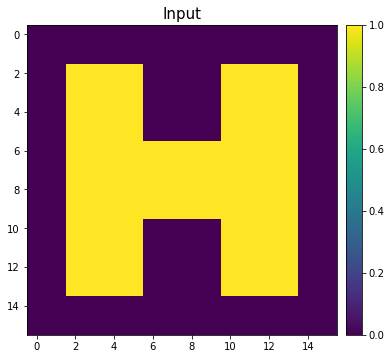

In [7]:
# Define the input - a matrix of pixels displaying an alphabetical letter
in_pixels = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                      [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                      [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                      [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                      [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                      [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                      [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                      [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                      [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                      [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                      [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                      [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
         

in_pixels2 = 1-in_pixels
in_pixels2[3,3] = 1
print(in_pixels2)
         
[m, n] = in_pixels.shape            # dimensions of the input matrix: m-->number of rows, n-->number of columns
N = np.size(in_pixels)              # (N = m*n) number of pixels == number of neurons in the neural network behind the input: each neuron is connected with one pixel

# Display the input

fig, ax = plt.subplots(figsize = (6, 8)) # opens a separate window where to plot the figure and assigns it a title
# creates a 2-dimensional image of a matrix by assigning a colour to each value of the matrix depending on the value itself:
# high values-->brighter, low values-->darker 
# interpolation = 'nearest' -> removes blurry effect due to interpolation
# cmap = 'viridis'           -> selects the scale of colours we want to use
img = ax.imshow(in_pixels, interpolation='nearest', cmap='viridis')

ax.set_title('Input', fontsize=15);  # assign title to figure;

# Add colorbar
# This just makes the cmap to be shown properly rather than overlapping onto the plots
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes('right', "5%", pad = "3%")
cm = fig.colorbar(img, cax =  cax)  # displays the color bar

### Part 1 : training

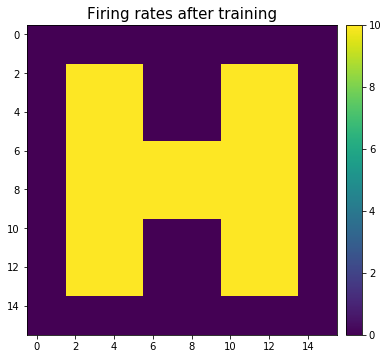

In [8]:
# Define parameters
gamma = 0.01          # learning rate
threshold = 1         # firing threshold when the total input to a neuron reaches this value than the neuron fires
freq_max = 10         # maximum allowed frequency
w_init_max = 0.0005   # maximum value of initial weights (or connections) distribution
external_signal = 2  # firing rate due to external input, when present

niter = 10            # number of iterations

# Initial conditions
w = w_init_max * np.random.rand(N,N)                    # initial weights matrix: each neuron is connected with all the other neurons through a random connection between 0 and w_init_max
np.fill_diagonal(w,0)                                   # set to zero all elements on the principal diagonal (auto interaction)
neurons_freq = np.zeros([N,1])                          # initial value of the firing rate-->zero
external_input = external_signal * in_pixels            # each neuron receives or not an external input equal to external_signal depending whether the pixel it is connected to is active (1) or not (0)
external_input = np.reshape(external_input, (N,1))      # rearrange the N elements of the mxn matrix of external inputs into a vector Nx1, to simplify the operations below

fig, ax = plt.subplots(figsize = (6, 8)) # opens a separate window where to plot the figure and assigns it a title
# Training loop
for j in range(niter):
    neurons_total_input = external_input + np.dot(w, neurons_freq)
    neurons_output = np.maximum((neurons_total_input - threshold), 0)   # Element-wise maximum of array elements
    neurons_freq = np.minimum(neurons_output, freq_max)                 # Element-wise minimum of array elements
    w = w + gamma * np.dot(neurons_freq, neurons_freq.T)
    np.fill_diagonal(w,0)
    #fig.add_subplot(j)
    #img = ax[j//4][j%3].imshow(np.reshape(neurons_total_input, (n, m)))


# Display the output
out_pixels = np.reshape(neurons_freq, (n, m))           # inverse conversion from vector to n x m matrix



# creates a 2-dimensional image of a matrix by assigning a colour to each value of the matrix depending on the value itself:
# high values-->brighter, low values-->darker 
# interpolation = 'nearest' -> removes blurry effect due to interpolation
# cmap = 'viridis'           -> selects the scale of colours we want to use
img = ax.imshow(out_pixels, interpolation='nearest', cmap='viridis')

ax.set_title('Firing rates after training', fontsize=15);  # assign title to figure;

# Add colorbar
# This just makes the cmap to be shown properly rather than overlapping onto the plots
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes('right', "5%", pad = "3%")
cm = fig.colorbar(img, cax =  cax) # displays the color bar


### Part 2:  recalling image from partial information

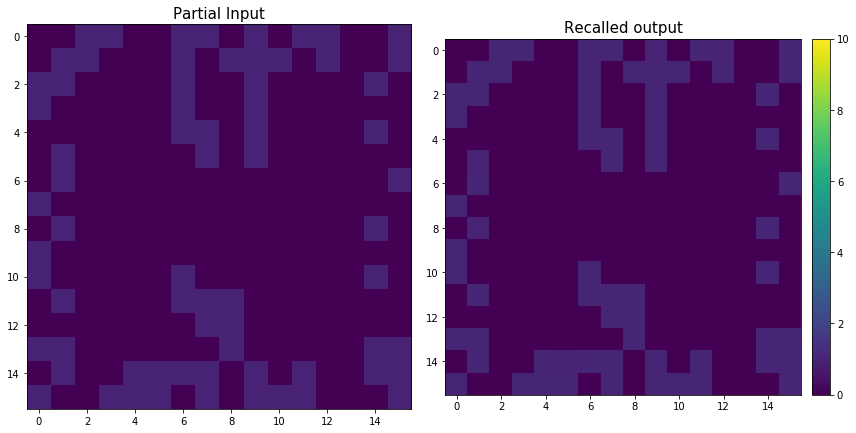

In [15]:
# Destroy the input at random locations
partial_input = in_pixels2 * np.random.randint(2, size=(m,n))

# Show the consequent partial input
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize =(12, 14))
img1 = ax1.imshow(partial_input, interpolation='nearest', cmap='viridis')
ax1.set_title('Partial Input', fontsize=15)

# Recalling operation
external_input_partial = external_signal * np.reshape(partial_input, (N, 1))
neurons_freq_new = np.zeros([N,1])

for j in range(niter):
   neurons_freq_new = np.maximum(((external_input_partial + np.dot(w, neurons_freq_new)) - threshold), 0)
   neurons_freq_new = np.minimum(neurons_freq_new, freq_max)


# Display the output
out_pixels_reconstruction = np.reshape(neurons_freq_new, (n, m))


img2 = ax2.imshow(out_pixels_reconstruction, interpolation='nearest', cmap='viridis')
ax2.set_title('Recalled output', fontsize=15)

fig.subplots_adjust(right=0.8)

# This just makes the cmap to be shown properly rather than overlapping onto the plots
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes('right', "5%", pad = "3%")
cm = fig.colorbar(img, cax =  cax)


# Make the colors for images match the colorbar range
img1.set_clim(vmin=0, vmax=freq_max)
img2.set_clim(vmin=0, vmax=freq_max)
cm.set_clim(vmin=0, vmax=freq_max)

fig.tight_layout()

### Part 3: Forgetting image via Anti-Hebb rule

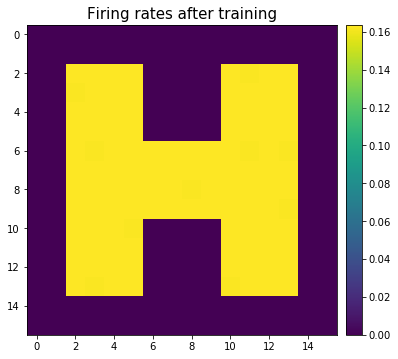

In [28]:
#TODO: Implement the anti-hebbian learning rule in order to forget the image.
# Define parameters
gamma = 0.01          # learning rate
threshold = 1         # firing threshold when the total input to a neuron reaches this value than the neuron fires
freq_max = 10         # maximum allowed frequency
w_init_max = 0.0005   # maximum value of initial weights (or connections) distribution
external_signal = 1.22  # firing rate due to external input, when present

niter = 10            # number of iterations

# Initial conditions
w = w_init_max * np.random.rand(N,N)                    # initial weights matrix: each neuron is connected with all the other neurons through a random connection between 0 and w_init_max
np.fill_diagonal(w,0)                                   # set to zero all elements on the principal diagonal (auto interaction)
neurons_freq = np.zeros([N,1])                          # initial value of the firing rate-->zero
external_input = external_signal * in_pixels            # each neuron receives or not an external input equal to external_signal depending whether the pixel it is connected to is active (1) or not (0)
external_input = np.reshape(external_input, (N,1))      # rearrange the N elements of the mxn matrix of external inputs into a vector Nx1, to simplify the operations below

fig, ax = plt.subplots(figsize = (6, 8)) # opens a separate window where to plot the figure and assigns it a title
# Training loop
for j in range(niter):
    neurons_total_input = external_input + np.dot(w, neurons_freq)
    neurons_output = np.maximum((neurons_total_input - threshold), 0)   # Element-wise maximum of array elements
    neurons_freq = np.minimum(neurons_output, freq_max)                 # Element-wise minimum of array elements
    w = w - gamma * np.dot(neurons_freq, neurons_freq.T)
    np.fill_diagonal(w,0)
    #fig.add_subplot(j)
    #img = ax[j//4][j%3].imshow(np.reshape(neurons_total_input, (n, m)))


# Display the output
out_pixels = np.reshape(neurons_freq, (n, m))           # inverse conversion from vector to n x m matrix



# creates a 2-dimensional image of a matrix by assigning a colour to each value of the matrix depending on the value itself:
# high values-->brighter, low values-->darker 
# interpolation = 'nearest' -> removes blurry effect due to interpolation
# cmap = 'viridis'           -> selects the scale of colours we want to use
img = ax.imshow(out_pixels, interpolation='nearest', cmap='viridis')

ax.set_title('Firing rates after training', fontsize=15);  # assign title to figure;

# Add colorbar
# This just makes the cmap to be shown properly rather than overlapping onto the plots
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes('right', "5%", pad = "3%")
cm = fig.colorbar(img, cax =  cax) # displays the color bar

### Part 4: Demonstrating that the image is erased 

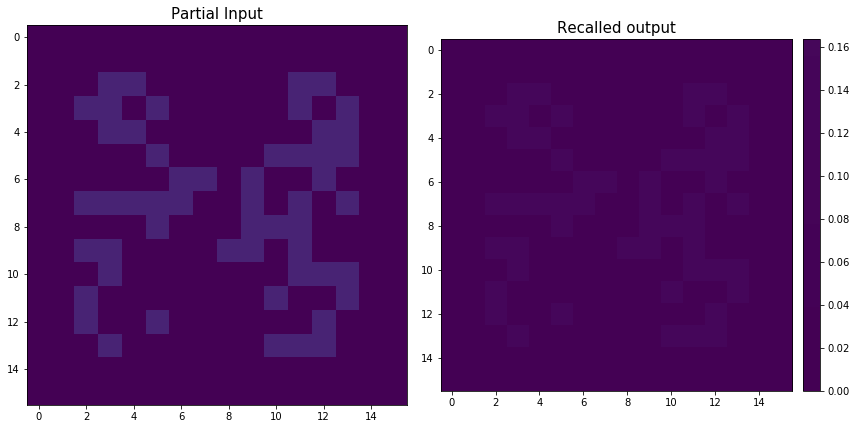

In [29]:
#TODO: Demostrate that there is not recollection of the image.
# Destroy the input at random locations
partial_input = in_pixels * np.random.randint(2, size=(m,n))

# Show the consequent partial input
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize =(12, 14))
img1 = ax1.imshow(partial_input, interpolation='nearest', cmap='viridis')
ax1.set_title('Partial Input', fontsize=15)

# Recalling operation
external_input_partial = external_signal * np.reshape(partial_input, (N, 1))
neurons_freq_new = np.zeros([N,1])

for j in range(niter):
   neurons_freq_new = np.maximum(((external_input_partial + np.dot(w, neurons_freq_new)) - threshold), 0)
   neurons_freq_new = np.minimum(neurons_freq_new, freq_max)


# Display the output
out_pixels_reconstruction = np.reshape(neurons_freq_new, (n, m))


img2 = ax2.imshow(out_pixels_reconstruction, interpolation='nearest', cmap='viridis')
ax2.set_title('Recalled output', fontsize=15)

fig.subplots_adjust(right=0.8)

# This just makes the cmap to be shown properly rather than overlapping onto the plots
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes('right', "5%", pad = "3%")
cm = fig.colorbar(img, cax =  cax)


# Make the colors for images match the colorbar range
img1.set_clim(vmin=0, vmax=freq_max)
img2.set_clim(vmin=0, vmax=freq_max)
cm.set_clim(vmin=0, vmax=freq_max)

fig.tight_layout()